In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np
import matplotlib.pyplot as plt
import os

Build the model, train the model:

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 45, 100)           25100     
                                                                 
 bidirectional_13 (Bidirecti  (None, 45, 300)          301200    
 onal)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 45, 300)           0         
                                                                 
 lstm_27 (LSTM)              (None, 100)               160400    
                                                                 
 dense_26 (Dense)            (None, 125)               12625     
                                                                 
 dense_27 (Dense)            (None, 251)               31626     
                                                     

sh: play: command not found


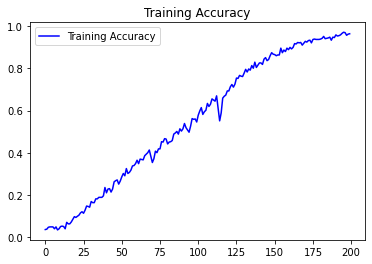

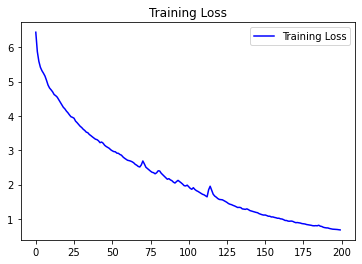

In [35]:
# text cleaning
tokenizer = Tokenizer()
data = open("./soft_power_cleaned.txt").read()
corpus = data.lower().split('\n')

# tokenize words
tokenizer.fit_on_texts(corpus)

# remember total number of words
total_words = len(tokenizer.word_index) +1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# padding sequences
max_sequence_len = max(
                        [len(x) for x in input_sequences]
                      )

input_sequences = np.array(pad_sequences(input_sequences,
                                    maxlen=max_sequence_len, padding='pre'))
    
# extract the alst word of the sequence and convert from numerical to categorical

# create predictors and label
predictors, label = input_sequences[:,:-1], input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

# now we make a sequential model:
model = Sequential()

# we make the first layer an embedding layer 
model.add(
    Embedding(total_words, 100,
                    input_length=max_sequence_len-1)
)

# the second layer will be a bidirectional LSTM
model.add(
    Bidirectional(LSTM(150, return_sequences = True))
        # return sequence flag True so that the word generation keeps in consideration previous
        # and future words in the sequence
)

# dropout layer to avoid overfitting
model.add(
    Dropout(0.2)
)

# another LSTM layer
model.add(
    LSTM(100)
)

# add a dense layer with ReLU activation plus a regularizer layer to avoid overfitting
model.add(
    Dense(total_words/2, activation='relu',
           kernel_regularizer=regularizers.l2(0.01))
)

# softmax to get the probability of the word to be predicted next
model.add(
    Dense(total_words, activation='softmax')
)

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# output model
print(model.summary())

results = model.fit(predictors, label, epochs=200, verbose=1)

acc = results.history['accuracy']
loss = results.history['loss']

# make a sound when finished (helpful for long runs)
duration = 1  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))

epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.title("Training Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label="Training Loss")
plt.title("Training Loss")
plt.legend()
# plt.show()


In [1]:
print(results.history.keys())

NameError: name 'results' is not defined

In [ ]:
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.title("Training Accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label="Training Loss")
plt.title("Training Loss")
# plt.legend()

plt.show()

In [36]:
seed_text = "Star wars is a cool film"
next_words = 100

for _ in range(next_words):
    # tokenize the seed sentence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # pad onto the token list
    token_list = pad_sequences([token_list],
        maxlen=max_sequence_len-1, padding='pre')

    # predict from seed
    predictions = model.predict(token_list, verbose=1)
    most_probable = np.argmax(predictions,axis=1)

    output_word = "sike"

    print(output_word,most_probable)

    for word, index in tokenizer.word_index.items():

        if index == most_probable: 
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 1s 1s/step
sike [100]
1/1 [==============================] - 0s 24ms/step
sike [4]
1/1 [==============================] - 0s 23ms/step
sike [6]
1/1 [==============================] - 0s 24ms/step
sike [9]
1/1 [==============================] - 0s 37ms/step
sike [101]
1/1 [==============================] - 0s 26ms/step
sike [102]
1/1 [==============================] - 0s 26ms/step
sike [1]
1/1 [==============================] - 0s 29ms/step
sike [33]
1/1 [==============================] - 0s 25ms/step
sike [14]
1/1 [==============================] - 0s 30ms/step
sike [19]
1/1 [==============================] - 0s 33ms/step
sike [103]
1/1 [==============================] - 0s 34ms/step
sike [5]
1/1 [==============================] - 0s 32ms/step
sike [17]
1/1 [==============================] - 0s 29ms/step
sike [20]
1/1 [==============================] - 0s 36ms/step
sike [60]
1/1 [==============================] - 0s 27ms/step
sike [104]
1/1 [=====